In [1]:
import warnings
warnings.filterwarnings("ignore")
# !pip install ftfy
import ftfy
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import re
from math import exp
from numpy import sign
import sys
print(sys.executable)
from PIL import Image # getting images in notebook
# !pip install gensim
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score
from gensim.models import KeyedVectors
from nltk.corpus import stopwords
from nltk import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# !pip install tensorflow

# !pip install tensorflow_hub

# !pip install bert-for-tf2
# !pip install sentencepiece

C:\Users\aanan\anaconda3\python.exe


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aanan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aanan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
from tensorflow import keras 
import tensorflow.keras as keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv1D, Dense, Input, LSTM, Embedding, Dropout, Activation, MaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
#from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
import re
from tqdm import tqdm
import tensorflow as tf
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow_hub as hub


In [3]:
train=pd.read_csv(r'C:\Users\aanan\Documents\Major-1\Datasets\train.csv')

In [4]:
test=pd.read_csv(r'C:\Users\aanan\Documents\Major-1\Datasets\dev.csv')

In [5]:
print("Training set has {} rows and {} columns.".format(train.shape[0], train.shape[1]))
print("Test set has {} rows and {} columns.".format(test.shape[0], test.shape[1]))

print()
print(train.columns)
print(test.columns)

Training set has 8891 rows and 3 columns.
Test set has 4496 rows and 3 columns.

Index(['PID', 'Text_data', 'Label'], dtype='object')
Index(['PID', 'Text data', 'Label'], dtype='object')


In [6]:
Sentiment = {'moderate': 1,'not depression': 0,'severe':2}
train.Label = [Sentiment[item] for item in train.Label]
test.Label= [Sentiment[item] for item in test.Label]

In [7]:
print('Count NaN:')
print(train.isnull().sum(), '\n')
print('Percentage NaN:')
print(train.isnull().sum()/ len(train))

Count NaN:
PID          0
Text_data    0
Label        0
dtype: int64 

Percentage NaN:
PID          0.0
Text_data    0.0
Label        0.0
dtype: float64


In [8]:
print('Count NaN:')
print(test.isnull().sum(), '\n')
print('Percentage NaN:')
print(test.isnull().sum()/ len(test))

Count NaN:
PID          0
Text data    0
Label        0
dtype: int64 

Percentage NaN:
PID          0.0
Text data    0.0
Label        0.0
dtype: float64


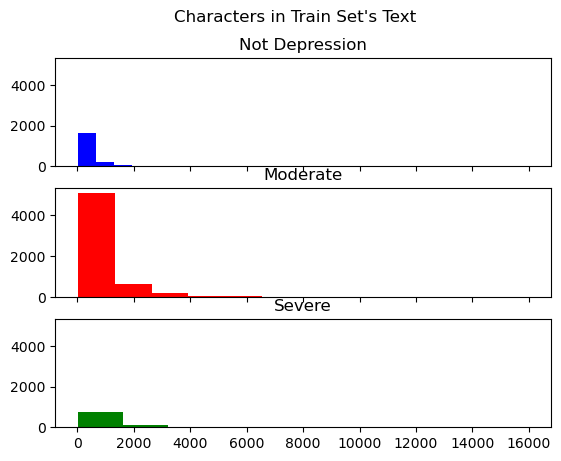

In [9]:
fig, axs = plt.subplots(3, sharex=True, sharey=True)
train_len = train[train['Label'] == 0]['Text_data'].str.len()
axs[0].hist(train_len,color='blue')
axs[0].set_title('Not Depression')
train_len = train[train['Label'] == 1]['Text_data'].str.len()
axs[1].hist(train_len,color='red')
axs[1].set_title('Moderate')
train_len = train[train['Label'] == 2]['Text_data'].str.len()
axs[2].hist(train_len,color='green')
axs[2].set_title('Severe')
fig.suptitle('Characters in Train Set\'s Text')
plt.show()

In [10]:
import string
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# NLTK Tweet Tokenizer for now
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)

corpus = []

# clean up text
def clean_text(text):
    """
    Copied from other notebooks
    """
    # expand acronyms
    
    # special characters
    text = re.sub(r"\x89Û_", "", text)
    text = re.sub(r"\x89ÛÒ", "", text)
    text = re.sub(r"\x89ÛÓ", "", text)
    text = re.sub(r"\x89ÛÏWhen", "When", text)
    text = re.sub(r"\x89ÛÏ", "", text)
    text = re.sub(r"China\x89Ûªs", "China's", text)
    text = re.sub(r"let\x89Ûªs", "let's", text)
    text = re.sub(r"\x89Û÷", "", text)
    text = re.sub(r"\x89Ûª", "", text)
    text = re.sub(r"\x89Û\x9d", "", text)
    text = re.sub(r"å_", "", text)
    text = re.sub(r"\x89Û¢", "", text)
    text = re.sub(r"\x89Û¢åÊ", "", text)
    text = re.sub(r"fromåÊwounds", "from wounds", text)
    text = re.sub(r"åÊ", "", text)
    text = re.sub(r"åÈ", "", text)
    text = re.sub(r"JapÌ_n", "Japan", text)    
    text = re.sub(r"Ì©", "e", text)
    text = re.sub(r"å¨", "", text)
    text = re.sub(r"SuruÌ¤", "Suruc", text)
    text = re.sub(r"åÇ", "", text)
    text = re.sub(r"å£3million", "3 million", text)
    text = re.sub(r"åÀ", "", text)
    
    # emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    
    
    """
    Our Stuff
    """
    # remove numbers
    text = re.sub(r'[0-9]', '', text)
    
    # remove punctuation and special chars (keep '!')
    for p in string.punctuation.replace('!', ''):
        text = text.replace(p, '')
        
    # remove urls
    text = re.sub(r'http\S+', '', text)
    
    # tokenize
    text = tknzr.tokenize(text)
    
    # remove stopwords
    text = [w.lower() for w in text if not w in stop_words]
    corpus.append(text)
    
    # join back
    text = ' '.join(text)
    
    return text

In [11]:
%%time
train['Text_data'] = train['Text_data'].apply(lambda s: clean_text(s))
test['Text data'] = test['Text data'].apply(lambda s: clean_text(s))

# see some cleaned data
train.sample(10)

Wall time: 13.1 s


,PID,Text_data,Label
8768,train_pid_8769,why i thoughts feeling way i dont know exactly...,2
2182,train_pid_2183,im guy today i cried removed,1
4153,train_pid_4154,i tried kill yesterday removed,1
8121,train_pid_8122,what number i endure i give it ’ new ’ day i ’...,2
8206,train_pid_8207,going happy depressed i feel like always thing...,2
1972,train_pid_1973,good riddance hello lots low moments one point...,1
6443,train_pid_6444,i hate new year ’ eve it ’ okay ’ celebrating ...,0
1372,train_pid_1373,am i depressed rough patchvent this probably g...,1
5342,train_pid_5343,i ’ never spent new years another friend i ’ e...,1
5079,train_pid_5080,overwhelmed little i feel ive become emotional...,1


In [12]:
texts = train['Text_data'].to_numpy()
word_freq = {}

for text in texts:
    for word in text.split():
        word_freq[word] = word_freq.get(word, 0) + 1

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
MAX_SEQUENCE_LENGTH = 40

tokenizer = Tokenizer()

tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
num_words = len(word_index) + 1
print('Found %s unique tokens.' % (num_words - 1))

# pad 
data = pad_sequences(
    sequences, 
    maxlen=MAX_SEQUENCE_LENGTH,
    padding='post', 
    truncating='post'
)

labels = train['Label'].to_numpy()
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 13266 unique tokens.
Shape of data tensor: (8891, 40)
Shape of label tensor: (8891,)


In [14]:
x_train = data
y_train = labels

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score

vectorizer = CountVectorizer()
x_train_vectorized = vectorizer.fit_transform(train['Text_data'])

# print vocabulary
print(vectorizer.get_feature_names()[2500:2600])

['courageous', 'course', 'courses', 'coursework', 'court', 'courtesy', 'cousin', 'cousindads', 'cousins', 'cousy', 'cover', 'coverage', 'covered', 'covering', 'covers', 'covid', 'cow', 'coward', 'cowardice', 'cowards', 'cower', 'cowered', 'coworker', 'coworkers', 'coz', 'cozy', 'cps', 'cptsd', 'crab', 'crack', 'cracked', 'cracking', 'cracks', 'cradle', 'cradled', 'craft', 'crafts', 'craig', 'craigslist', 'cramps', 'crap', 'crappier', 'crappy', 'crash', 'crashes', 'crashing', 'crave', 'craved', 'craving', 'cravings', 'crawl', 'crawled', 'crawling', 'crazed', 'craziest', 'crazy', 'crazyo', 'cream', 'create', 'created', 'creates', 'creating', 'creation', 'creations', 'creative', 'creativity', 'creator', 'creators', 'creature', 'creatures', 'credit', 'creep', 'creeped', 'creeping', 'creeps', 'creepy', 'crept', 'crevice', 'crib', 'crickets', 'cried', 'cries', 'crieswhy', 'crime', 'crimes', 'criminal', 'cringe', 'cringey', 'cringing', 'cringy', 'cripple', 'crippled', 'cripples', 'crippling',

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [30]:
X_train, X_cv, Y_train, Y_cv = train_test_split(train["Text_data"], train["Label"], test_size = 0.2, random_state=42)

In [31]:
X_train = vectorizer.fit_transform(X_train)
X_train = X_train.toarray()
print(X_train.shape)

(7112, 12385)


In [32]:
X_cv = vectorizer.transform(X_cv)
X_cv = X_cv.toarray()
print(X_cv.shape)

(1779, 12385)


In [33]:
X_test = vectorizer.transform(test["Text data"])
X_test = X_test.toarray()
print(X_test.shape)

(4496, 12385)


In [34]:
vocab = vectorizer.get_feature_names()
print(f"Printing first 100 vocabulary samples:\n{vocab[:100]}")

Printing first 100 vocabulary samples:
['aa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaah', 'aback', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abbandoned', 'abdomen', 'abdominal', 'abide', 'abilify', 'abilities', 'ability', 'abit', 'able', 'ablewant', 'abnormal', 'abnormality', 'abomination', 'aborted', 'about', 'aboutalthough', 'above', 'abraham', 'abroad', 'abroadare', 'abruptly', 'abs', 'abscense', 'absence', 'absent', 'absenteeism', 'absentmindedly', 'absolute', 'absolutely', 'absorb', 'absorbing', 'abstinence', 'absurd', 'absurdly', 'abt', 'abundance', 'abuse', 'abused', 'abuser', 'abuses', 'abusing', 'abusive', 'abysmal', 'abyss', 'academic', 'academically', 'academics', 'accelerate', 'accentuation', 'accept', 'acceptance', 'accepted', 'accepting', 'access', 'accessible', 'accident', 'accidental', 'accidentally', 'accidents', 'accompanied', 'accompany', 'accomplish', 'accomplished', 'accomplishing', 'accomplishment', 'ac

In [35]:
clf = AdaBoostClassifier(n_estimators=100) 
clf = clf.fit( X_train, Y_train)

In [36]:
predictions = clf.predict(X_cv) 
print("Accuracy: ", accuracy_score(Y_cv, predictions))

Accuracy:  0.7110736368746486


In [37]:
print(classification_report(Y_cv,predictions))

              precision    recall  f1-score   support

           0       0.57      0.15      0.24       397
           1       0.72      0.95      0.82      1205
           2       0.66      0.36      0.47       177

    accuracy                           0.71      1779
   macro avg       0.65      0.49      0.51      1779
weighted avg       0.68      0.71      0.65      1779



### TF-IDF

In [38]:
X_train, X_test , y_train, y_test = train_test_split(train['Text_data'].values,train['Label'].values,test_size=0.2,random_state=123,stratify=train['Label'].values)
tfidf_vectorizer = TfidfVectorizer() 

tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train)

tfidf_test_vectors = tfidf_vectorizer.transform(X_test)

In [39]:
classifier = AdaBoostClassifier()

classifier.fit(tfidf_train_vectors,y_train)

AdaBoostClassifier()

In [40]:
y_pred = classifier.predict(tfidf_test_vectors)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.26      0.35       397
           1       0.74      0.91      0.82      1201
           2       0.70      0.40      0.51       181

    accuracy                           0.72      1779
   macro avg       0.66      0.52      0.56      1779
weighted avg       0.69      0.72      0.68      1779



In [41]:
# Split data into train and test sets
import gensim
X_train, X_test, y_train, y_test = train_test_split (train['Text_data'], train['Label'] , test_size=0.2)
w2v_model = gensim.models.Word2Vec(X_train,
                                   vector_size=100,
                                   window=5,
                                   min_count=2)

In [42]:
words = set(w2v_model.wv.index_to_key )
X_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in X_train])
X_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in X_test])

In [43]:
# Compute sentence vectors by averaging the word vectors for the words contained in the sentence
X_train_vect_avg = []
for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(100, dtype=float))
        
X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(100, dtype=float))

In [44]:
clf = AdaBoostClassifier()
clf = clf.fit(X_train_vect_avg, y_train.values.ravel())

In [46]:
y_pred = clf.predict(X_test_vect_avg)

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.42      0.50       383
           1       0.76      0.92      0.83      1228
           2       0.39      0.08      0.14       168

    accuracy                           0.73      1779
   macro avg       0.59      0.47      0.49      1779
weighted avg       0.69      0.73      0.69      1779

